<a href="https://colab.research.google.com/github/RocioArevalo/Telco/blob/main/Entrega3Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Importar librerias y bd

In [ ]:
# Importa la librería de Google Colab para trabajar con archivos locales.
from google.colab import files

# Importa las bibliotecas para el manejo de datos y análisis:
import numpy as np  # Para trabajar con arreglos y operaciones matemáticas.
import pandas as pd  # Para manipular y analizar datos estructurados.

# Importa las bibliotecas para visualización de datos:
import matplotlib.pyplot as plt  # Para crear gráficos básicos.
import seaborn as sns  # Para gráficos estadísticos más avanzados.

# La línea siguiente está comentada, pero normalmente monta Google Drive para acceder a archivos allí.
# drive.mount('/content/drive')

# Lista el contenido del directorio especificado para verificar que el archivo esté presente.
!ls -l '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Carga el archivo CSV en un DataFrame de pandas para su análisis.
dt = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')



-rw-r--r-- 1 root root 977501 Nov 17 15:25 /content/WA_Fn-UseC_-Telco-Customer-Churn.csv


Este bloque importa las bibliotecas necesarias para manejar y analizar datos:

pandas: Herramienta principal para manipulación de datos tabulares (filas y columnas).
numpy: Biblioteca para cálculos numéricos y manejo eficiente de matrices.
matplotlib.pyplot y seaborn: Herramientas para generar gráficos y visualizar datos.
sklearn: Biblioteca de aprendizaje automático con herramientas para preprocesamiento, entrenamiento y evaluación de modelos.

# Verificación de la calidad del Dataset

In [ ]:
# Muestra las primeras 5 filas del DataFrame para dar una vista previa de los datos cargados.
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Proporciona un resumen del DataFrame, incluyendo el número de entradas, nombres de columnas,
# número de valores no nulos y tipos de datos de cada columna.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Reemplaza los valores vacíos (representados como espacios en blanco " ") en la columna 'TotalCharges' con NaN (valores nulos).
dt['TotalCharges'] = dt['TotalCharges'].replace(" ", np.nan)

In [ ]:
# Verifica la cantidad de valores faltantes (NaN) en cada columna del DataFrame 'dt'
# - 'dt.isnull()' devuelve un DataFrame con valores booleanos donde 'True' indica un valor faltante (NaN) y 'False' un valor válido.
# - '.sum()' suma las ocurrencias de 'True' en cada columna, es decir, el número de valores faltantes por columna.
dt.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Filtra las filas del DataFrame 'dt' que contienen al menos un valor NaN (Not a Number) en alguna de sus columnas
dt[dt.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# Crea una copia del DataFrame original 'dt' para evitar modificar el DataFrame original
dtlimpia = dt.copy()

# Filtra las filas que contienen al menos un valor NaN (Not a Number) en cualquiera de sus columnas
filas_con_nan = dtlimpia[dtlimpia.isnull().any(axis=1)]

# Imprime las filas que contienen al menos un NaN
print(filas_con_nan)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
# Elimina las filas del DataFrame 'dtlimpia' donde la columna 'TotalCharges' tiene valores NaN (Not a Number)
dtlimpia = dtlimpia.dropna(subset=['TotalCharges'])

In [ ]:
# Muestra un resumen del DataFrame 'dtlimpia', proporcionando información sobre las columnas, el número de entradas,
# los tipos de datos y cuántos valores no nulos hay en cada columna.
dtlimpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
# Cuenta el número de valores nulos (NaN) en cada columna del DataFrame 'dtlimpia'
dtlimpia.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Muestra los nombres de las columnas del DataFrame 'dt'
dt.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Filtra las filas duplicadas en el DataFrame 'dt' y muestra solo esas filas
dt[dt.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# Verifica si alguna columna en el DataFrame 'dt' tiene valores duplicados
dt.T.duplicated().any()

False

In [ ]:
# Muestra las primeras 5 filas del DataFrame 'dt'
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Convierte la columna 'TotalCharges' a valores numéricos. Los valores que no puedan convertirse a numéricos
# se forzarán a NaN. Luego, se convierte la columna 'TotalCharges' a tipo de dato 'float64'.
dtlimpia['TotalCharges'] = pd.to_numeric(dt['TotalCharges'], errors='coerce').astype('float64')

In [ ]:
# Muestra un resumen del DataFrame 'dtlimpia', proporcionando información sobre las columnas, el número de entradas,
# los tipos de datos y cuántos valores no nulos hay en cada columna.
dtlimpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# Analisis exploratorio de Datos: Univariado

In [ ]:
#sns.pairplot(dtlimpia)

In [ ]:
# Muestra estadísticas descriptivas para las columnas numéricas del DataFrame 'dtlimpia', como la media, la desviación estándar,
# los valores mínimo y máximo, y los percentiles (25%, 50%, 75%).
dtlimpia.describe()

# Imprime una línea en blanco para separar la salida anterior de cualquier otro resultado posterior en la consola.
print()

In [ ]:
# Inicializa el contador de 'Yes' y el total de registros
contar = 0  # Contador de los clientes que han desertado ('Yes')
total = 0  # Contador total de registros

# Itera sobre la columna 'Churn' del DataFrame 'dtlimpia'
for x in dtlimpia['Churn']:
    total += 1  # Incrementa el contador total en cada iteración
    if x == 'Yes':  # Verifica si el valor de la columna 'Churn' es 'Yes' (indicando que el cliente ha desertado)
        contar += 1  # Incrementa el contador de desertores si el valor es 'Yes'

# Imprime el número de clientes que han desertado
print(contar)

# Imprime el número total de registros en la columna 'Churn'
print(total)

# Calcula e imprime el porcentaje de clientes que han desertado con respecto al total
print("El porcentaje de desertores en la base de datos es " + str(contar / total * 100) + "%")

1869
7032
El porcentaje de desertores en la base de datos es 26.578498293515356%


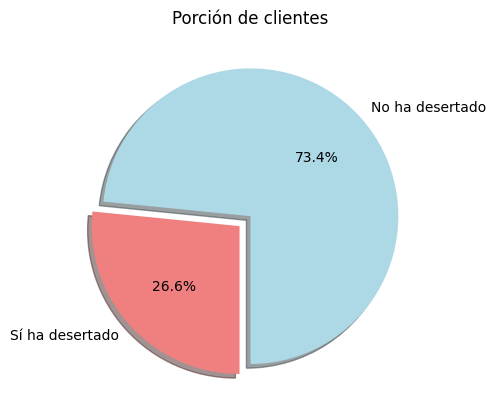

In [ ]:
# Importa la herramienta Axes3D para gráficos en 3D, aunque no se usa en este código
from mpl_toolkits.mplot3d import Axes3D

# Cuenta las ocurrencias de cada valor en la columna 'Churn' (sí/no) en 'dtlimpia'
churn_counts = dtlimpia['Churn'].value_counts()

# Define las etiquetas para los segmentos del gráfico circular
etiquetas = ['No ha desertado', 'Sí ha desertado']

# Crea un gráfico circular (pie chart) con los datos de 'churn_counts'
# - 'labels' define las etiquetas para cada porción.
# - 'autopct' muestra el porcentaje de cada segmento.
# - 'colors' define los colores de cada porción.
# - 'explode' separa un segmento ligeramente para destacarlo.
# - 'shadow' agrega una sombra al gráfico.
# - 'startangle' rota el gráfico para empezar desde un ángulo específico.
plt.pie(churn_counts, labels=etiquetas, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], explode=[0, 0.1], shadow=True, startangle=270)

# Establece el título del gráfico
plt.title('Porción de clientes')

# Muestra el gráfico
plt.show()

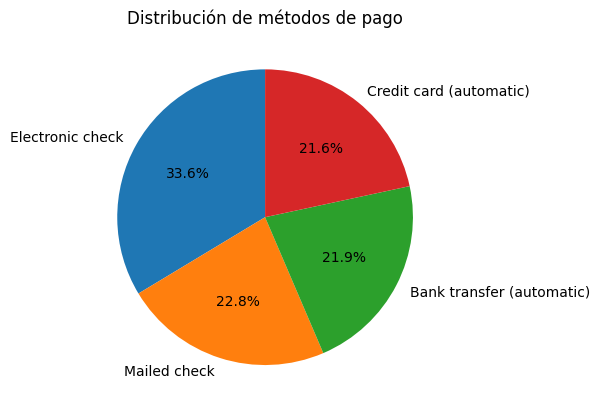

In [ ]:
# Cuenta las ocurrencias de cada valor en la columna 'PaymentMethod' (métodos de pago) de 'dtlimpia'
cantidad_pago = dtlimpia['PaymentMethod'].value_counts()

# Crea un gráfico circular (pie chart) para visualizar la distribución de métodos de pago
# - 'cantidad_pago' es el conteo de los distintos métodos de pago.
# - 'labels=cantidad_pago.index' usa los índices de 'cantidad_pago' como etiquetas para las porciones del gráfico.
# - 'autopct='%1.1f%%'' muestra el porcentaje de cada porción con un decimal.
# - 'startangle=90' rota el gráfico para que comience desde el ángulo de 90 grados.
plt.pie(cantidad_pago, labels=cantidad_pago.index, autopct='%1.1f%%', startangle=90)

# Establece el título del gráfico
plt.title('Distribución de métodos de pago')

# Muestra el gráfico
plt.show()

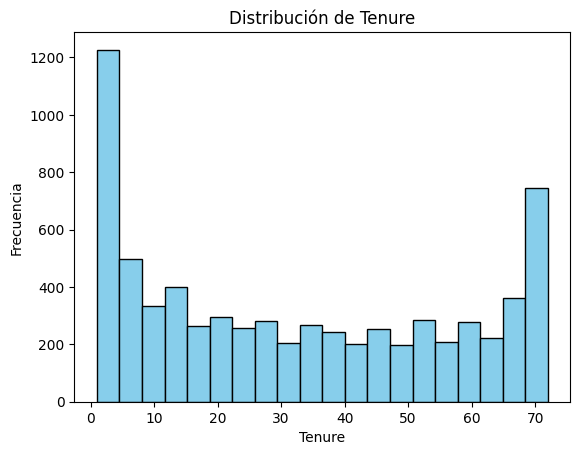

In [ ]:
# Crea un histograma para visualizar la distribución de la columna 'tenure' (tiempo de permanencia)
# - 'bins=20' divide el rango de datos en 20 intervalos.
# - 'color='skyblue'' establece el color de las barras del histograma.
# - 'edgecolor='black'' agrega un borde negro alrededor de las barras.
plt.hist(dtlimpia['tenure'], bins=20, color='skyblue', edgecolor='black')

# Establece la etiqueta para el eje X (Tenure)
plt.xlabel('Tenure')

# Establece la etiqueta para el eje Y (Frecuencia)
plt.ylabel('Frecuencia')

# Establece el título del gráfico
plt.title('Distribución de Tenure')

# Muestra el gráfico
plt.show()

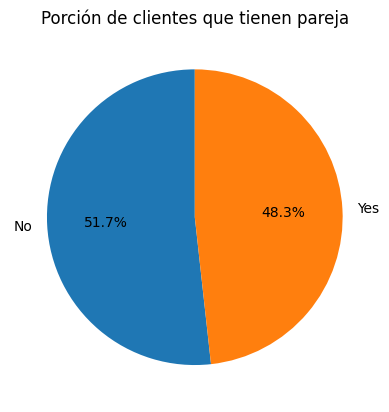

In [ ]:
# Cuenta las ocurrencias de cada valor en la columna 'Partner' (información sobre si los clientes tienen pareja) de 'dtlimpia'
cant_part = dtlimpia['Partner'].value_counts()

# Crea un gráfico circular (pie chart) para visualizar la distribución de clientes que tienen pareja
# - 'cant_part' es el conteo de los distintos valores en la columna 'Partner'.
# - 'labels=cant_part.index' usa los índices de 'cant_part' como etiquetas para las porciones del gráfico.
# - 'autopct='%1.1f%%'' muestra el porcentaje de cada porción con un decimal.
# - 'startangle=90' rota el gráfico para que comience desde el ángulo de 90 grados.
plt.pie(cant_part, labels=cant_part.index, autopct='%1.1f%%', startangle=90)

# Establece el título del gráfico
plt.title('Porción de clientes que tienen pareja')

# Muestra el gráfico
plt.show()

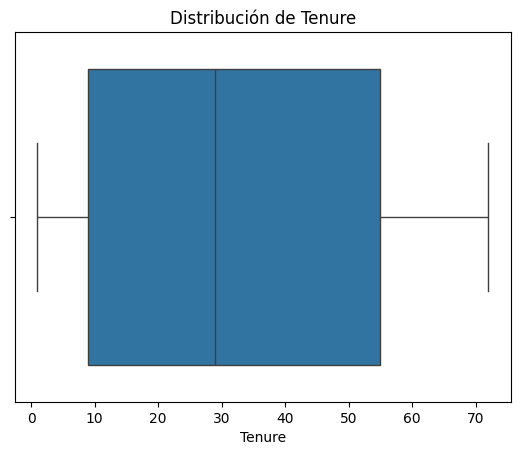

In [ ]:
# Crea un gráfico de caja (boxplot) para visualizar la distribución de la columna 'tenure' (tiempo de permanencia).
# - 'x='tenure'' especifica que se usará la columna 'tenure' para crear el gráfico de caja.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='tenure', data=dtlimpia)

# Establece la etiqueta para el eje X como 'Tenure'
plt.xlabel('Tenure')

# Establece el título del gráfico como 'Distribución de Tenure'
plt.title('Distribución de Tenure')

# Muestra el gráfico en pantalla
plt.show()

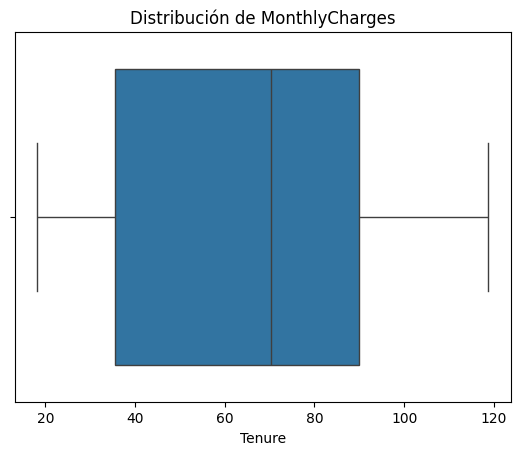

In [ ]:
# Crea un gráfico de caja (boxplot) para visualizar la distribución de la columna 'MonthlyCharges' (cargos mensuales).
# - 'x='MonthlyCharges'' especifica que se usará la columna 'MonthlyCharges' para crear el gráfico de caja.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='MonthlyCharges', data=dtlimpia)

# Establece la etiqueta para el eje X como 'Tenure', pero debe ser cambiado a 'MonthlyCharges' para que coincida con el gráfico.
plt.xlabel('MonthlyCharges')

# Establece el título del gráfico como 'Distribución de MonthlyCharges'
plt.title('Distribución de MonthlyCharges')

# Muestra el gráfico en pantalla
plt.show()

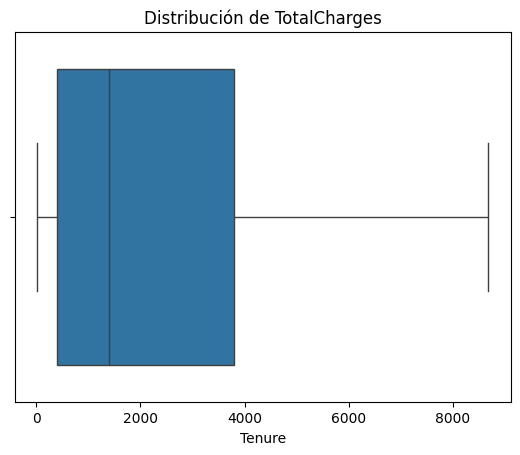

In [ ]:
# Crea un gráfico de caja (boxplot) para visualizar la distribución de la columna 'TotalCharges' (cargos totales).
# - 'x='TotalCharges'' especifica que se usará la columna 'TotalCharges' para crear el gráfico de caja.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='TotalCharges', data=dtlimpia)

# Establece la etiqueta para el eje X como 'Tenure', pero debe ser cambiado a 'TotalCharges' para que coincida con el gráfico.
plt.xlabel('TotalCharges')

# Establece el título del gráfico como 'Distribución de TotalCharges'
plt.title('Distribución de TotalCharges')

# Muestra el gráfico en pantalla
plt.show()

In [ ]:
#for column in dt.columns:
 # if dtlimpia[column].dtype == 'object'and column != 'customerID':
  #  values = dtlimpia[column].value_counts()
   # plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    #plt.title(f'Distribución de {column}')
    #plt.show()

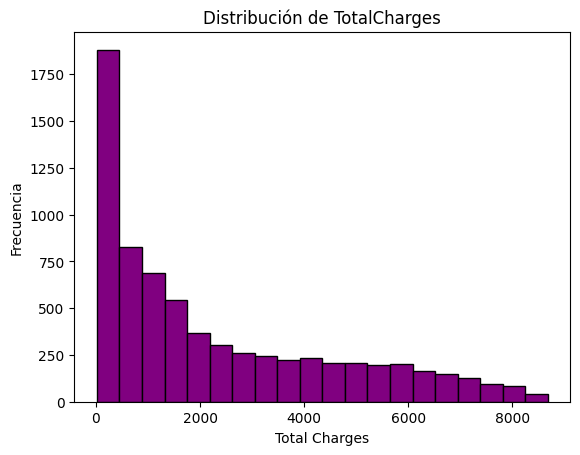

In [ ]:
# Crea un histograma para visualizar la distribución de la columna 'TotalCharges' (cargos totales).
# - 'bins=20' especifica el número de barras (bins) en el histograma (20 barras en este caso).
# - 'color='purple'' define el color de las barras como morado.
# - 'edgecolor='black'' establece el color de los bordes de las barras como negro.
plt.hist(dtlimpia['TotalCharges'], bins=20, color='purple', edgecolor='black')

# Establece la etiqueta para el eje X como 'Total Charges'
plt.xlabel('Total Charges')

# Establece la etiqueta para el eje Y como 'Frecuencia' para indicar la cantidad de observaciones en cada rango de valores.
plt.ylabel('Frecuencia')

# Establece el título del gráfico como 'Distribución de TotalCharges'
plt.title('Distribución de TotalCharges')

# Muestra el gráfico en pantalla
plt.show()

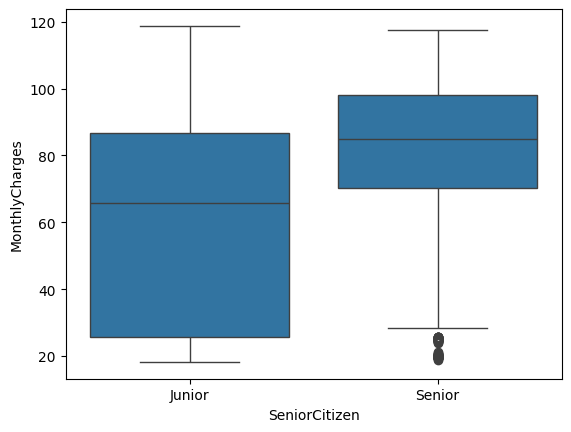

In [ ]:
# Crea un gráfico de caja (boxplot) comparando los cargos mensuales (MonthlyCharges) entre clientes jóvenes (SeniorCitizen = 0) y mayores (SeniorCitizen = 1).
# - 'x='SeniorCitizen'' indica que usaremos la variable "SeniorCitizen" como eje X, dividiendo los clientes en dos grupos: "Junior" (SeniorCitizen = 0) y "Senior" (SeniorCitizen = 1).
# - 'y='MonthlyCharges'' establece que se visualizarán los cargos mensuales en el eje Y.
sns.boxplot(x='SeniorCitizen', y='MonthlyCharges', data=dtlimpia)

# Ajusta los nombres de las etiquetas del eje X para que sean más intuitivos.
plt.xticks([0, 1], ['Junior', 'Senior'])

# Muestra el gráfico en pantalla
plt.show()

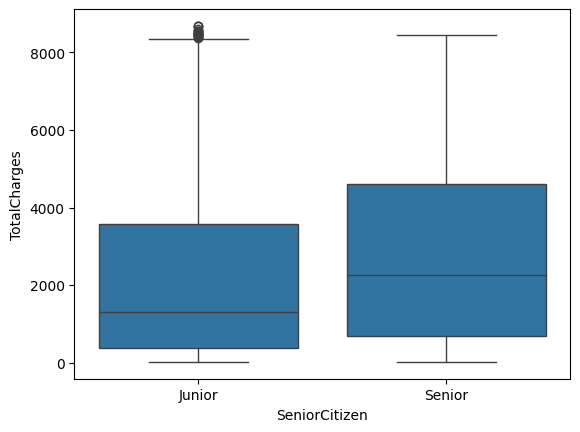

In [ ]:
# Crea un gráfico de caja (boxplot) para comparar la distribución de los 'TotalCharges' (cargos totales) entre clientes mayores y menores de 65 años.
# - 'x='SeniorCitizen'' especifica que se usará la columna 'SeniorCitizen' para categorizar a los clientes en 'Junior' (no senior) y 'Senior'.
# - 'y='TotalCharges'' especifica que se visualizará la distribución de los 'TotalCharges' para cada categoría.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='SeniorCitizen', y='TotalCharges', data=dtlimpia)

# Establece las etiquetas para las categorías del eje X: 'Junior' (0) y 'Senior' (1).
plt.xticks([0, 1], ['Junior', 'Senior'])

# Muestra el gráfico en pantalla
plt.show()

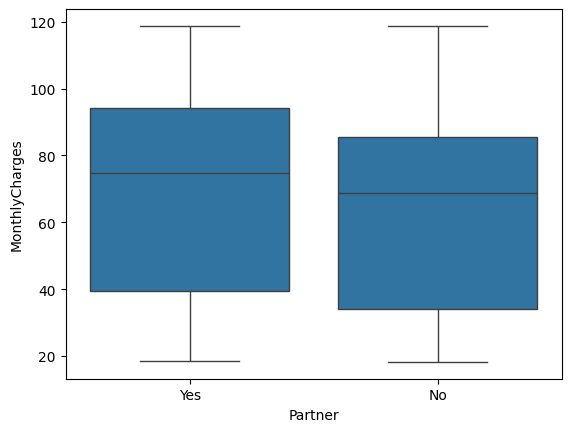

In [ ]:
# Crea un gráfico de caja (boxplot) para comparar la distribución de los 'MonthlyCharges' (cargos mensuales) entre clientes con pareja y sin pareja.
# - 'x='Partner'' especifica que se usará la columna 'Partner' para categorizar a los clientes en aquellos que tienen pareja y aquellos que no tienen.
# - 'y='MonthlyCharges'' especifica que se visualizará la distribución de los 'MonthlyCharges' para cada categoría.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='Partner', y='MonthlyCharges', data=dtlimpia)

# Muestra el gráfico en pantalla
plt.show()

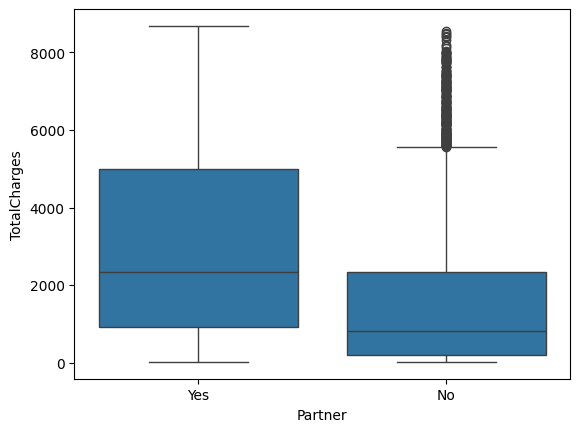

In [ ]:
# Crea un gráfico de caja (boxplot) para comparar la distribución de los 'TotalCharges' (cargos totales) entre clientes con pareja y sin pareja.
# - 'x='Partner'' especifica que se usará la columna 'Partner' para categorizar a los clientes en aquellos que tienen pareja ('Yes') y aquellos que no tienen pareja ('No').
# - 'y='TotalCharges'' especifica que se visualizará la distribución de los 'TotalCharges' para cada categoría.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='Partner', y='TotalCharges', data=dtlimpia)

# Muestra el gráfico en pantalla
plt.show()

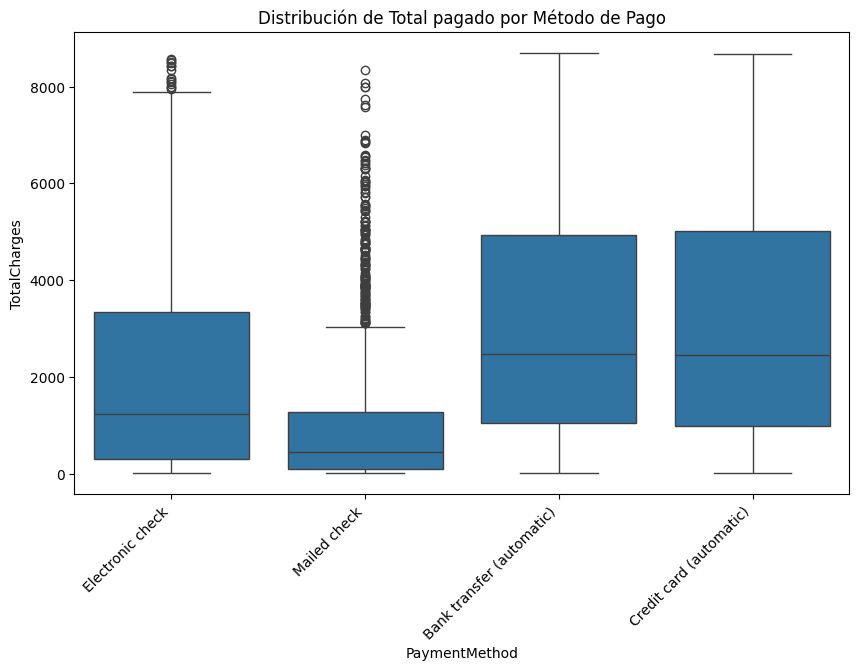

In [ ]:
# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(10, 6))

# Crea un gráfico de caja (boxplot) para comparar la distribución de los 'TotalCharges' (cargos totales) entre los diferentes métodos de pago.
# - 'x='PaymentMethod'' especifica que se usará la columna 'PaymentMethod' para categorizar a los clientes por el método de pago que usan.
# - 'y='TotalCharges'' especifica que se visualizará la distribución de los 'TotalCharges' para cada método de pago.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='PaymentMethod', y='TotalCharges', data=dtlimpia)

# Rota las etiquetas del eje X para que se vean mejor, especialmente si son largas, y ajusta la alineación.
plt.xticks(rotation=45, ha='right')

# Añade un título al gráfico
plt.title('Distribución de Total pagado por Método de Pago')

# Muestra el gráfico en pantalla
plt.show()

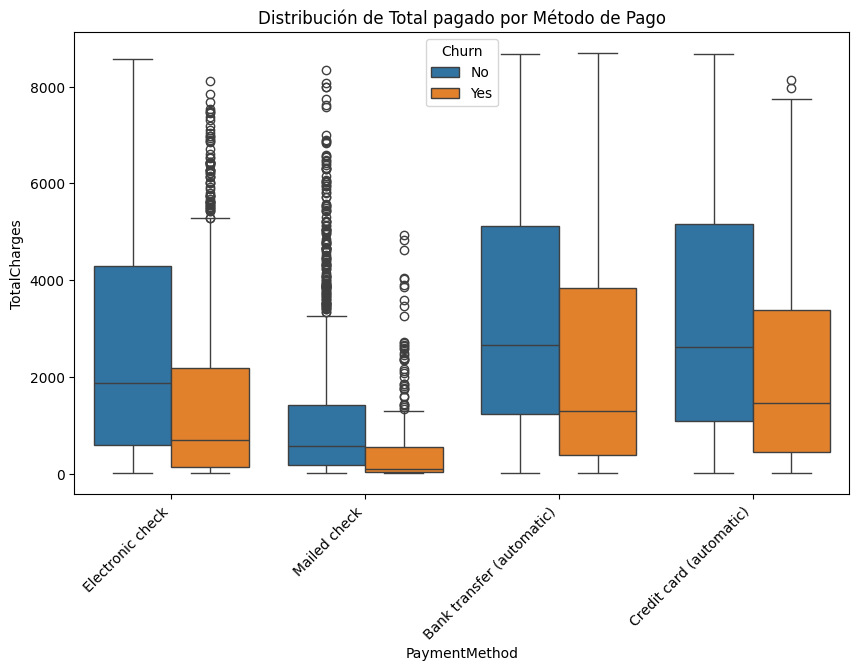

In [ ]:
# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(10, 6))

# Crea un gráfico de caja (boxplot) para comparar la distribución de los 'TotalCharges' (cargos totales) entre los diferentes métodos de pago,
# diferenciando entre los clientes que han desertado ('Churn') y los que no.
# - 'x='PaymentMethod'' especifica que se usará la columna 'PaymentMethod' para categorizar a los clientes por el método de pago que usan.
# - 'y='TotalCharges'' especifica que se visualizará la distribución de los 'TotalCharges' para cada método de pago.
# - 'hue='Churn'' agrega una diferenciación de color entre los clientes que han desertado ('Yes') y los que no ('No').
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='PaymentMethod', y='TotalCharges', hue='Churn', data=dtlimpia)

# Rota las etiquetas del eje X para que se vean mejor, especialmente si son largas, y ajusta la alineación.
plt.xticks(rotation=45, ha='right')

# Añade un título al gráfico
plt.title('Distribución de Total pagado por Método de Pago')

# Muestra el gráfico en pantalla
plt.show()

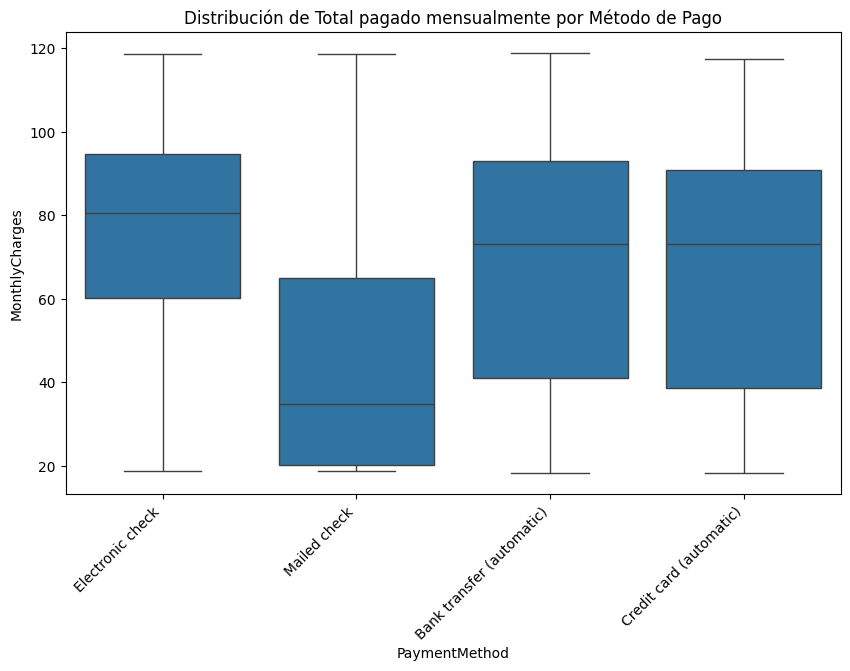

In [ ]:
# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(10, 6))

# Crea un gráfico de caja (boxplot) para comparar la distribución de los 'MonthlyCharges' (cargos mensuales) entre los diferentes métodos de pago.
# - 'x='PaymentMethod'' especifica que se usará la columna 'PaymentMethod' para categorizar a los clientes por el método de pago que usan.
# - 'y='MonthlyCharges'' especifica que se visualizará la distribución de los 'MonthlyCharges' para cada método de pago.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=dtlimpia)

# Rota las etiquetas del eje X para que se vean mejor, especialmente si son largas, y ajusta la alineación.
plt.xticks(rotation=45, ha='right')

# Añade un título al gráfico
plt.title('Distribución de Total pagado mensualmente por Método de Pago')

# Muestra el gráfico en pantalla
plt.show()

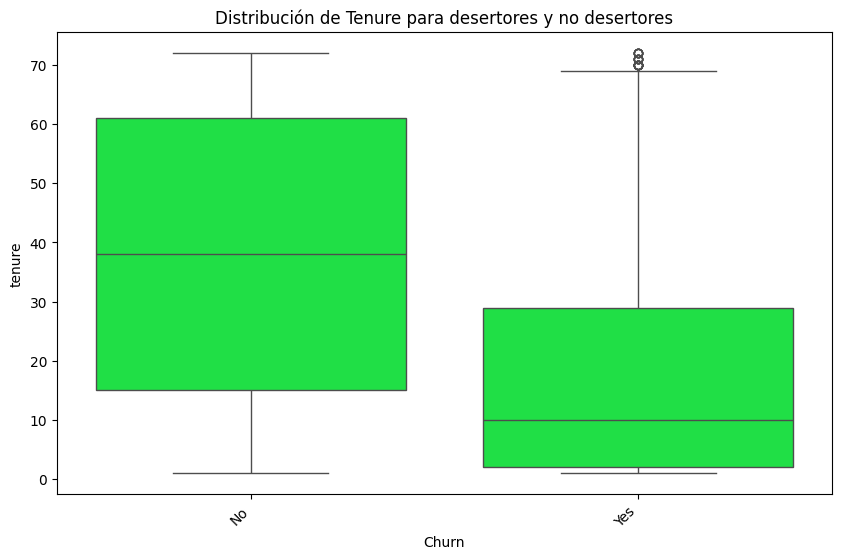

In [ ]:
# Configura el tamaño de la figura para el gráfico
plt.figure(figsize=(10, 6))

# Crea un gráfico de caja (boxplot) para comparar la distribución de 'tenure' (antigüedad) entre los clientes que desertaron ('Churn' = 'Yes') y los que no desertaron ('Churn' = 'No').
# - 'x='Churn'' especifica que se usará la columna 'Churn' para categorizar a los clientes según si han desertado o no.
# - 'y='tenure'' especifica que se visualizará la distribución de los valores de 'tenure' (antigüedad de los clientes) para los diferentes grupos de desertores.
# - 'data=dtlimpia' indica que se utilizará el DataFrame 'dtlimpia' para obtener los datos.
# - 'color='#00FF33'' establece el color verde brillante para las cajas del gráfico.
sns.boxplot(x='Churn', y='tenure', data=dtlimpia, color='#00FF33')

# Rota las etiquetas del eje X para mejorar la legibilidad, especialmente si son largas, y ajusta la alineación de las etiquetas para que se alineen a la derecha.
plt.xticks(rotation=45, ha='right')

# Añade un título al gráfico
plt.title('Distribución de Tenure para desertores y no desertores')

# Muestra el gráfico en pantalla
plt.show()

In [ ]:
# Calcula el tercer cuartil (Q3) de la columna 'tenure' para los clientes que NO han desertado ('Churn' = 'No')
q3_no = dtlimpia[dtlimpia['Churn'] == 'No']['tenure'].quantile(0.75)

# Calcula el tercer cuartil (Q3) de la columna 'tenure' para los clientes que SÍ han desertado ('Churn' = 'Yes')
q3_yes = dtlimpia[dtlimpia['Churn'] == 'Yes']['tenure'].quantile(0.75)

# Imprime el tercer cuartil para los clientes que NO han desertado
print(f"Tercer cuartil para Churn = No: {q3_no}")

# Imprime el tercer cuartil para los clientes que SÍ han desertado
print(f"Tercer cuartil para Churn = Yes: {q3_yes}")


Tercer cuartil para Churn = No: 61.0
Tercer cuartil para Churn = Yes: 29.0


In [ ]:
# Lista de servicios a analizar
servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
             'StreamingMovies']

# Bucle para iterar sobre cada servicio en la lista 'servicios'
for servicio in servicios:
    # Imprime el nombre del servicio seguido de los valores contados
    print(f'{servicio}:')

    # Cuenta los valores únicos en la columna correspondiente al servicio y los muestra
    value_counts = dtlimpia[servicio].value_counts()

    # Imprime los resultados de la cuenta de valores
    print(value_counts)

    # Muestra el porcentaje de clientes que usan/no usan el servicio
    print(f'Porcentaje de clientes con {servicio}:')
    print((value_counts / value_counts.sum()) * 100)  # Calcula el porcentaje

    # Imprime una línea en blanco para separar los resultados de cada servicio
    print('\n')

PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


OnlineBackup:
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


DeviceProtection:
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


TechSupport:
TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


StreamingTV:
StreamingTV
No                     2809
Yes                    2703
No internet service  

In [ ]:

#fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))


#axes = axes.flatten()


#for i, servicio in enumerate(servicios):
 # dtlimpia[servicio].value_counts().plot(kind='bar', ax=axes[i])
 # axes[i].set_title(servicio)
 # axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


#plt.tight_layout()
#plt.show()

In [ ]:
# Crea una copia del DataFrame original para trabajar en ella sin modificar los datos originales
Pruebas = dtlimpia.copy()

# Convierte la columna 'tenure' a tipo numérico, forzando los valores no numéricos a ser 'NaN'
Pruebas['tenure'] = pd.to_numeric(Pruebas['tenure'], errors='coerce').astype('float64')

In [ ]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=Pruebas)
#plt.title('Relación entre Monthly Charges y Tenure según estado de deserción')
#plt.show()

In [ ]:
#plt.figure(figsize=(8, 6))
#sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=dtlimpia)
#plt.title('Relación entre Monthly Charges y Total Charges según estado de deserción')
#plt.show()

# Analisis exploratorio de Datos: Multivariado

In [ ]:
# Muestra un resumen conciso del DataFrame 'dtlimpia', incluyendo el número de entradas,
# el tipo de datos de cada columna, el número de valores no nulos y el uso de memoria.
dtlimpia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
# Cuenta el número de ocurrencias de cada valor en la columna 'Churn'
churn_cuenta = dtlimpia['Churn'].value_counts()

# Obtiene el número de clientes que han desertado (valor 'Yes') de la serie 'churn_cuenta'
# Si no existe 'Yes' en la serie, devuelve 0
num = churn_cuenta.get('Yes', 0)

# Imprime el número de desertores
print(num)

# Imprime la cuenta de desertores y no desertores
print(churn_cuenta)

# Calcula y muestra el porcentaje de clientes que han desertado con respecto al total
# Esto se obtiene dividiendo 1869 (el número de desertores) entre 7032 (el total de clientes)
print(1869 / 7032)

1869
Churn
No     5163
Yes    1869
Name: count, dtype: int64
0.26578498293515357


In [ ]:
# Crea una copia del DataFrame 'dtlimpia' para trabajar sobre él sin modificar el original.
dtbinary = dtlimpia.copy()

# Itera sobre cada columna del DataFrame.
for column in dtlimpia.columns:

  # Verifica si la columna tiene tipo de dato 'object' (categórica) y contiene los valores 'Yes' y 'No'.
  # Además, comprueba que solo tiene dos valores únicos (esto indica que es una columna binaria).
  if dtlimpia[column].dtype == object and 'Yes' in dtlimpia[column].values and 'No' in dtlimpia[column].values and len(dtlimpia[column].unique()) == 2:

    # Reemplaza los valores 'Yes' por 1 y 'No' por 0 en la columna binaria.
    dtbinary[column] = dtlimpia[column].replace({'Yes': 1, 'No': 0})

<ipython-input-45-7949f38667bc>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dtbinary[column] = dtlimpia[column].replace({'Yes': 1, 'No': 0})


In [ ]:
# Muestra las primeras 5 filas del DataFrame 'dtbinary' para inspeccionar las columnas que han sido modificadas.
dtbinary.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
dt.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Muestra información detallada sobre el DataFrame 'dtbinary', incluyendo el tipo de datos y la cantidad de valores no nulos por columna.
dtbinary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  
 17  

In [ ]:
# Muestra un resumen estadístico de las columnas numéricas del DataFrame 'dtbinary', incluyendo la media, desviación estándar, valores mínimo y máximo, entre otros.
dtbinary.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [ ]:
# Muestra los nombres de las columnas del DataFrame 'dtlimpia' para inspeccionar las variables presentes en el conjunto de datos.
dtlimpia.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Crea una copia del DataFrame 'dtbinary' para no modificar el original y trabajar sobre 'dtbinaryfloat'.
dtbinaryfloat = dtbinary.copy()

# Define una lista de las columnas que se desean convertir a tipo numérico.
columnas_a_convertir = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'Churn']

# Convierte las columnas seleccionadas a tipo numérico. Si hay valores no convertibles, se reemplazan por NaN (con 'errors="coerce"').
for columna in columnas_a_convertir:
  dtbinaryfloat[columna] = pd.to_numeric(dtbinaryfloat[columna], errors='coerce').astype('float64')

In [ ]:
# Muestra un resumen de la información del DataFrame dtbinaryfloat, incluyendo el tipo de datos de cada columna,
# el número de valores no nulos y el uso de memoria para verificar que las conversiones a tipo float64 fueron exitosas.
dtbinaryfloat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   float64
 3   Partner           7032 non-null   float64
 4   Dependents        7032 non-null   float64
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   float64
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   float64
 17  

In [ ]:
# Muestra las primeras 5 filas del DataFrame dtbinaryfloat para inspeccionar cómo quedaron los datos después de la conversión.
dtbinaryfloat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,1.0,0.0,1.0,0.0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,5575-GNVDE,Male,0.0,0.0,0.0,34.0,1.0,No,DSL,Yes,...,Yes,No,No,No,One year,0.0,Mailed check,56.95,1889.50,0.0
2,3668-QPYBK,Male,0.0,0.0,0.0,2.0,1.0,No,DSL,Yes,...,No,No,No,No,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,Male,0.0,0.0,0.0,45.0,0.0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,9237-HQITU,Female,0.0,0.0,0.0,2.0,1.0,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1.0,Electronic check,70.70,151.65,1.0


In [ ]:
# Muestra los nombres de las columnas del DataFrame dtbinaryfloat para verificar las columnas que contienen los datos después de la conversión.
dtbinaryfloat.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Crea una copia del DataFrame dtbinaryfloat para trabajar con él sin modificar el original.
dtobjetos = dtbinaryfloat.copy()

# Selecciona las columnas de tipo 'object' en el DataFrame dtbinaryfloat y las guarda en object_columns.
object_columns = dtbinaryfloat.select_dtypes(include=['object']).columns

# Elimina las columnas de tipo 'object' en el DataFrame dtobjetos.
dtobjetos = dtobjetos.drop(object_columns, axis=1)

# Muestra las primeras 5 filas del DataFrame dtobjetos después de eliminar las columnas de tipo 'object'.
dtobjetos.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0
1,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,0.0
2,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0
3,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,1.0


In [ ]:
# Muestra las primeras 5 filas del DataFrame dtbinaryfloat para visualizar cómo se ve después de las conversiones de datos.
dtbinaryfloat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,1.0,0.0,1.0,0.0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,5575-GNVDE,Male,0.0,0.0,0.0,34.0,1.0,No,DSL,Yes,...,Yes,No,No,No,One year,0.0,Mailed check,56.95,1889.50,0.0
2,3668-QPYBK,Male,0.0,0.0,0.0,2.0,1.0,No,DSL,Yes,...,No,No,No,No,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,Male,0.0,0.0,0.0,45.0,0.0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,9237-HQITU,Female,0.0,0.0,0.0,2.0,1.0,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1.0,Electronic check,70.70,151.65,1.0


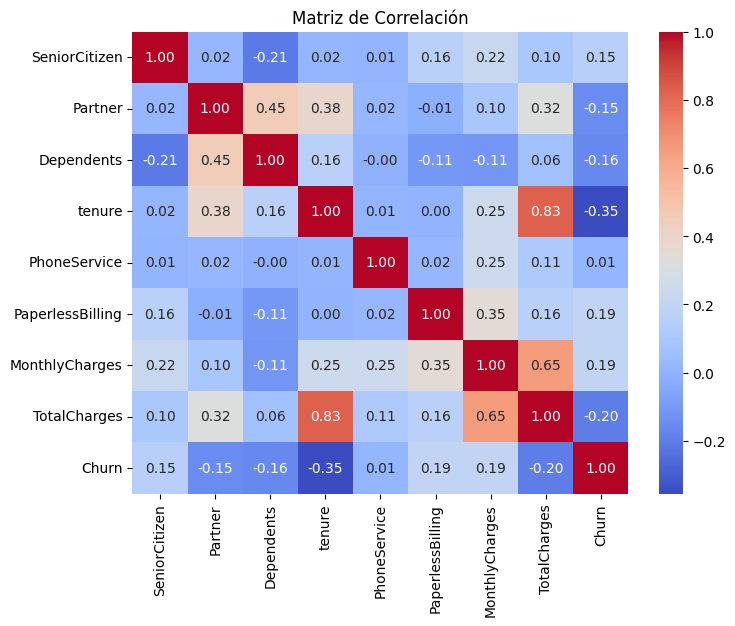

In [ ]:
# Calcula la matriz de correlación entre las columnas numéricas del DataFrame dtbinary.
# Luego, crea un gráfico de calor (heatmap) para visualizar las correlaciones.
correlation_matrix = dtbinary.corr(numeric_only=True)

# Define el tamaño de la figura para el gráfico.
plt.figure(figsize=(8, 6))

# Dibuja el heatmap utilizando la matriz de correlación, con anotaciones de los valores y una paleta de colores 'coolwarm'.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agrega un título al gráfico.
plt.title('Matriz de Correlación')

# Muestra el gráfico.
plt.show()

In [ ]:
# Filtra el DataFrame 'dtlimpia' para encontrar clientes que cumplen con las siguientes condiciones:
# 1. Tienen servicio telefónico ('PhoneService' == 'Yes').
# 2. No tienen múltiples líneas ('MultipleLines' == 'No').
# 3. No tienen servicio de Internet ('InternetService' == 'No').
# 4. No tienen seguridad en línea ('OnlineSecurity' == 'No').
# 5. No tienen respaldo en línea ('OnlineBackup' == 'No').
# 6. No tienen protección de dispositivos ('DeviceProtection' == 'No').
# 7. No tienen soporte técnico ('TechSupport' == 'No').
# 8. No tienen servicios de streaming de TV ('StreamingTV' == 'No').
# 9. No tienen servicios de streaming de películas ('StreamingMovies' == 'No').
# Luego, cuenta cuántos registros cumplen con todas estas condiciones y devuelve el número de filas.

print(dtlimpia[(dtlimpia['PhoneService'] == 'Yes') &
               (dtlimpia['MultipleLines'] == 'No') &
               (dtlimpia['InternetService'] == 'No') &
               (dtlimpia['OnlineSecurity'] == 'No') &
               (dtlimpia['OnlineBackup'] == 'No') &
               (dtlimpia['DeviceProtection'] == 'No') &
               (dtlimpia['TechSupport'] == 'No') &
               (dtlimpia['StreamingTV'] == 'No') &
               (dtlimpia['StreamingMovies'] == 'No')].shape[0])


0


# Verificación de supuestos


In [ ]:
#supuesto de relación lineal entre el logit y el target value
import statsmodels.formula.api as smf
import numpy as np

variables_to_test = ['tenure', 'MonthlyCharges', 'TotalCharges']

def logit(p):
    return np.log(p / (1 - p))

X = data[['gender_Male', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y = data['Churn']
model = LogisticRegression()
model.fit(X, y)
data['Churn_pred'] = model.predict_proba(X)[:, 1]

formula = 'Churn ~ ' + ' + '.join(variables_to_test) + ' + logit(Churn_pred)' + ' + ' + ' + '.join([f'{var}*logit(Churn_pred)' for var in variables_to_test])
augmented_model = smf.logit(formula=formula, data=data).fit()

print(augmented_model.summary())

Optimization terminated successfully.
         Current function value: 0.413483
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7024
Method:                           MLE   Df Model:                            7
Date:                Sun, 17 Nov 2024   Pseudo R-squ.:                  0.2859
Time:                        15:28:03   Log-Likelihood:                -2907.6
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.3365      0.176      1.91

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
p_value_churn_pred = augmented_model.pvalues['logit(Churn_pred)']
print(f"Valor p exacto de Churn_pred: {p_value_churn_pred}")

Valor p exacto de Churn_pred: 5.229956288249454e-21


Rechazo de la hipótesis nula: Un valor p de 5,2e-21 indica que rechazamos la hipótesis nula para ese término. En el contexto de la prueba de log-linealidad con el modelo aumentado, la hipótesis nula es que la relación entre el logit de la probabilidad predicha y la variable de respuesta (Churn) es lineal.

In [ ]:
!pip install statsmodels==0.13.5

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

In [ ]:
residuals = y_test - model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
#supuesto de indepencia entre observaciones
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic}")

Durbin-Watson statistic: 1.7274826789838338


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#supuesto multicolinealidad
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                  feature          VIF
0                             gender_Male     1.002106
1                           SeniorCitizen     1.153220
2                                 Partner     1.462988
3                              Dependents     1.381598
4                                  tenure     7.584453
5                            PhoneService  1773.528816
6                          OnlineSecurity     6.338349
7                            OnlineBackup     6.796678
8                        DeviceProtection     6.924754
9                             TechSupport     6.476508
10                            StreamingTV    24.080019
11                        StreamingMovies    24.156394
12                       PaperlessBilling     1.208455
13                         MonthlyCharges   866.089640
14                           TotalCharges    10.811490
15         MultipleLines_No phone service    60.842267
16                      MultipleLines_Yes     7.289761
17        

#Modelo predictivo regresión logistica (Balanceada)

In [ ]:
dtdummie=dtbinaryfloat.copy()
dtdummie.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,1.0,0.0,1.0,0.0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,5575-GNVDE,Male,0.0,0.0,0.0,34.0,1.0,No,DSL,Yes,...,Yes,No,No,No,One year,0.0,Mailed check,56.95,1889.50,0.0
2,3668-QPYBK,Male,0.0,0.0,0.0,2.0,1.0,No,DSL,Yes,...,No,No,No,No,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,7795-CFOCW,Male,0.0,0.0,0.0,45.0,0.0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,9237-HQITU,Female,0.0,0.0,0.0,2.0,1.0,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1.0,Electronic check,70.70,151.65,1.0


In [ ]:
dtdummie = dtdummie.drop('customerID', axis=1)

In [ ]:
dtdummie.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,1.0,0.0,1.0,0.0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,Male,0.0,0.0,0.0,34.0,1.0,No,DSL,Yes,No,Yes,No,No,No,One year,0.0,Mailed check,56.95,1889.50,0.0
2,Male,0.0,0.0,0.0,2.0,1.0,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,Male,0.0,0.0,0.0,45.0,0.0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,Female,0.0,0.0,0.0,2.0,1.0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1.0,Electronic check,70.70,151.65,1.0


In [ ]:
categorical_cols = ['MultipleLines', 'InternetService','Contract', 'PaymentMethod','gender']

data = pd.get_dummies(dtdummie, columns=categorical_cols, drop_first=True, dtype=int)

In [ ]:
data = data.replace({"Yes": 1, "No": 0})

In [ ]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,34.0,1.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,0.0,0.0,0.0,2.0,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.0,0.0,0.0,45.0,0.0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
4,0.0,0.0,0.0,2.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


data = data.replace({'Yes': 1, 'No': 0, 'No internet service': 0})

X = data[['gender_Male', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', random_state=20)
result=model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = pd.DataFrame(model.coef_.T, X.columns, columns=['Coeficiente'])
print(coefficients)

                                       Coeficiente
gender_Male                              -0.007671
SeniorCitizen                             0.095190
Partner                                   0.020322
Dependents                               -0.100205
tenure                                   -1.352183
PhoneService                             -0.005603
OnlineSecurity                           -0.132999
OnlineBackup                              0.008869
DeviceProtection                          0.044757
TechSupport                              -0.119189
StreamingTV                               0.244448
StreamingMovies                           0.249615
PaperlessBilling                          0.121038
MonthlyCharges                           -0.789701
TotalCharges                              0.655332
MultipleLines_No phone service            0.005603
MultipleLines_Yes                         0.155694
InternetService_Fiber optic               0.700719
InternetService_No             

<ipython-input-68-756599100f70>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'Yes': 1, 'No': 0, 'No internet service': 0})


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.71      0.80      1033
         1.0       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



Confusion Matrix:
 [[733 300]
 [ 78 296]]


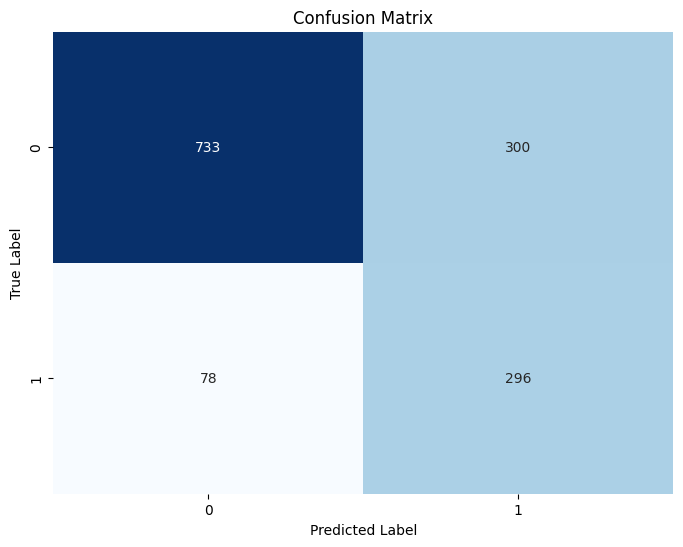

In [ ]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:\n", accuracy)

Accuracy:
 0.7313432835820896


# Modelo predictivo regresión logística (no balanceada)

In [ ]:
data = data.replace({'Yes': 1, 'No': 0, 'No internet service': 0})

X = data[['gender_Male', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
result=model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = pd.DataFrame(model.coef_.T, X.columns, columns=['Coeficiente'])
print(coefficients)

                                       Coeficiente
gender_Male                              -0.015837
SeniorCitizen                             0.094861
Partner                                   0.024935
Dependents                               -0.100195
tenure                                   -1.437157
PhoneService                             -0.035109
OnlineSecurity                           -0.158670
OnlineBackup                             -0.012364
DeviceProtection                          0.036293
TechSupport                              -0.146480
StreamingTV                               0.205216
StreamingMovies                           0.214605
PaperlessBilling                          0.134717
MonthlyCharges                           -0.581331
TotalCharges                              0.685081
MultipleLines_No phone service            0.035109
MultipleLines_Yes                         0.156807
InternetService_Fiber optic               0.631312
InternetService_No             

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1033
         1.0       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Confusion Matrix:
 [[916 117]
 [181 193]]


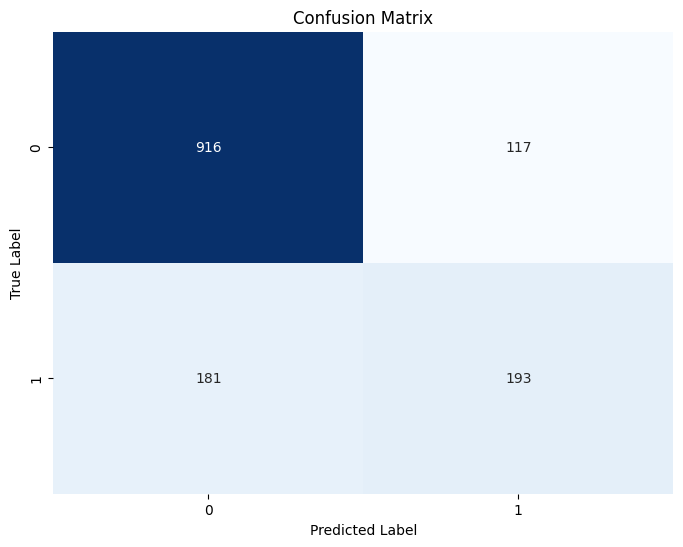

In [ ]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Árbol de decisión

In [ ]:
print(data.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'Churn_pred'],
      dtype='object')


Reporte de clasificación:

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      1033
         1.0       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.72      0.72      0.72      1407

Precisión del modelo:  0.7157071783937455


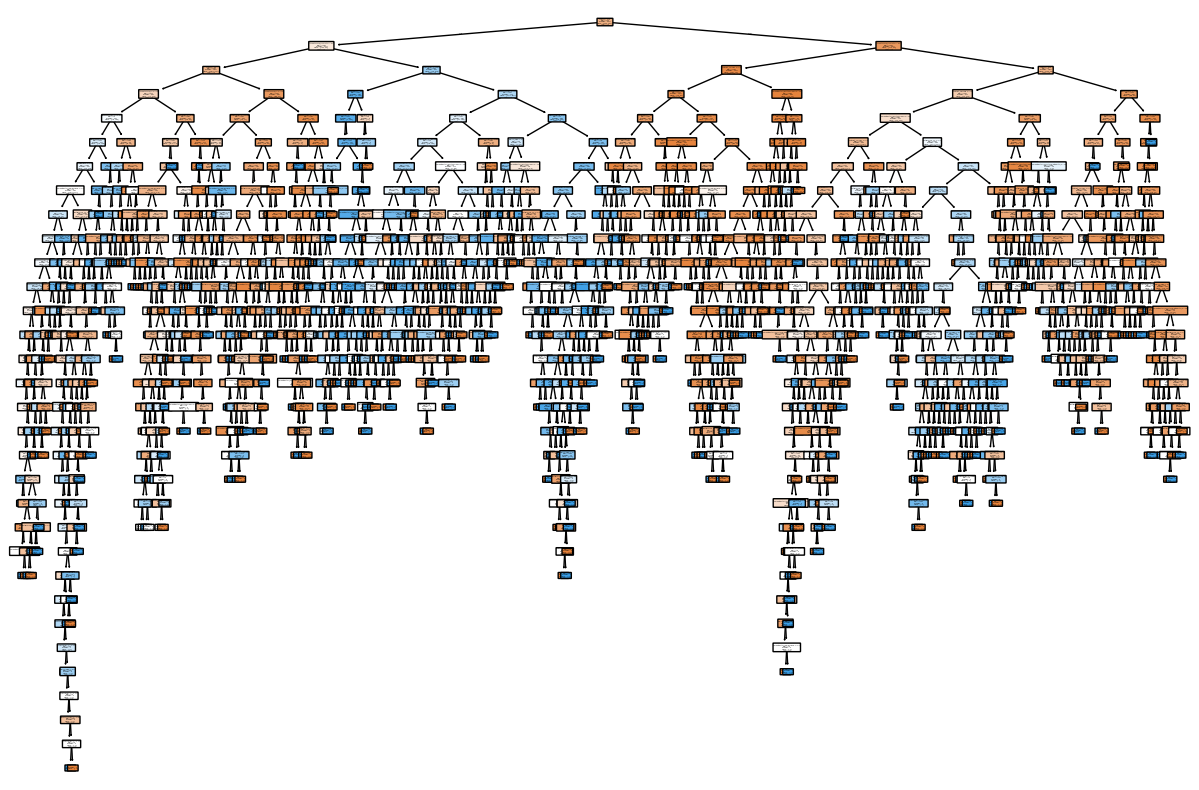

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

X = data[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male']]

y = data['Churn']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

print("Precisión del modelo: ", accuracy_score(y_test, y_pred))

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique().astype(str), rounded=True)
plt.show()



Confusion Matrix:
 [[817 216]
 [184 190]]


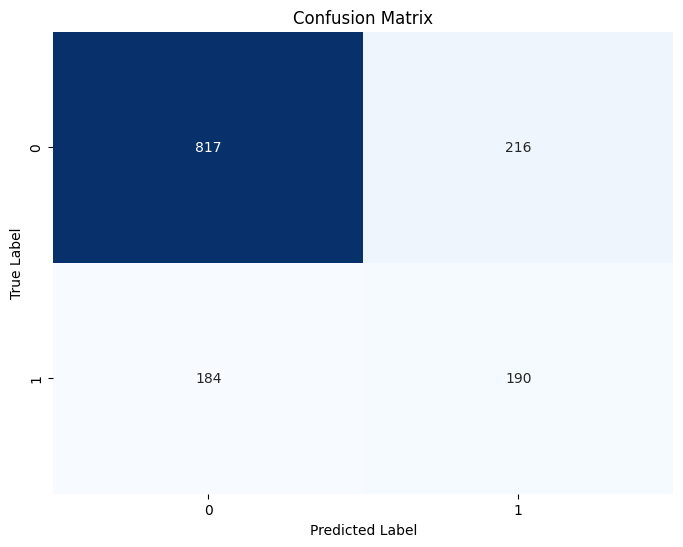

In [ ]:
# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# SVM


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
modelsvm = svm.fit(X= X_train, y = y_train)

In [ ]:
from sklearn import metrics
y_pred_train_svm = modelsvm.predict(X_train)

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      4130
         1.0       0.65      0.56      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.80      0.80      0.80      5625



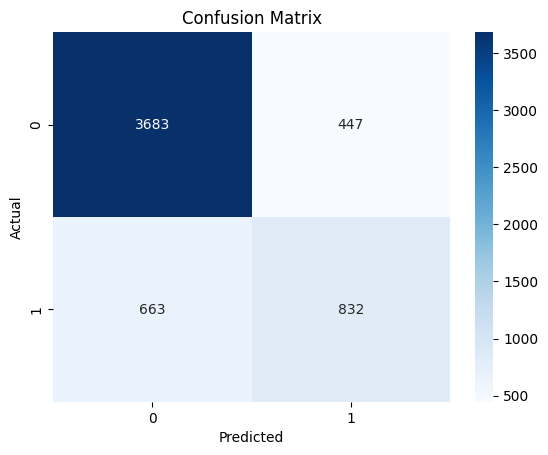

In [ ]:
print(metrics.classification_report(y_train, y_pred_train_svm))
cm = metrics.confusion_matrix(y_train, y_pred_train_svm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_pred_test_svm = modelsvm.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1033
         1.0       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



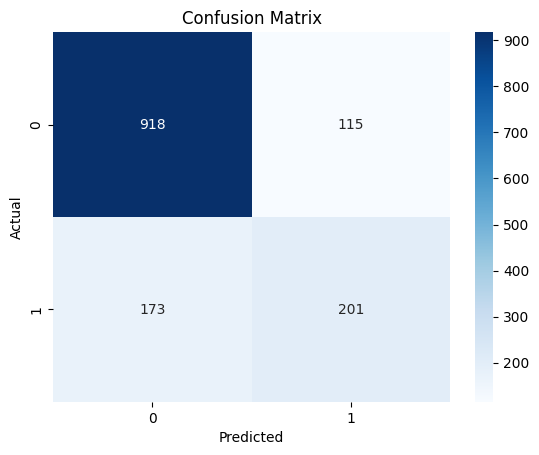

In [ ]:
print(metrics.classification_report(y_test, y_pred_test_svm))
cm = metrics.confusion_matrix(y_test, y_pred_test_svm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

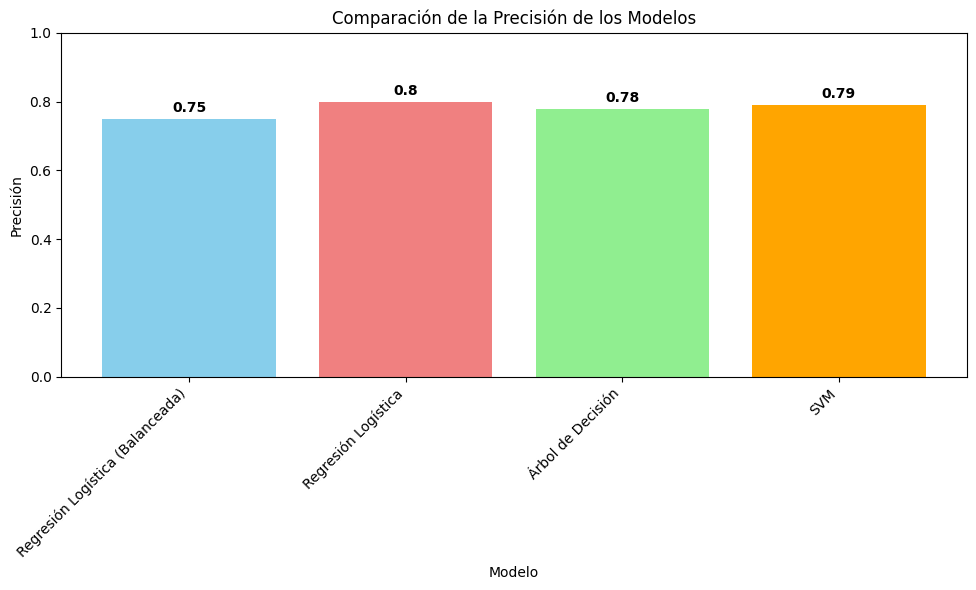

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que tienes las precisiones de cada modelo guardadas en variables:
accuracy_logreg_balanced = 0.75  # Reemplaza con la precisión real
accuracy_logreg = 0.80       # Reemplaza con la precisión real
accuracy_dt = 0.78          # Reemplaza con la precisión real
accuracy_svm = 0.79          # Reemplaza con la precisión real


models = ['Regresión Logística (Balanceada)', 'Regresión Logística', 'Árbol de Decisión', 'SVM']
accuracies = [accuracy_logreg_balanced, accuracy_logreg, accuracy_dt, accuracy_svm]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Comparación de la Precisión de los Modelos')
plt.ylabel('Precisión')
plt.xlabel('Modelo')
plt.ylim(0, 1)  # Limitar el eje y entre 0 y 1 para la precisión
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad

# Agregar etiquetas de precisión encima de las barras
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', fontweight='bold')

plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

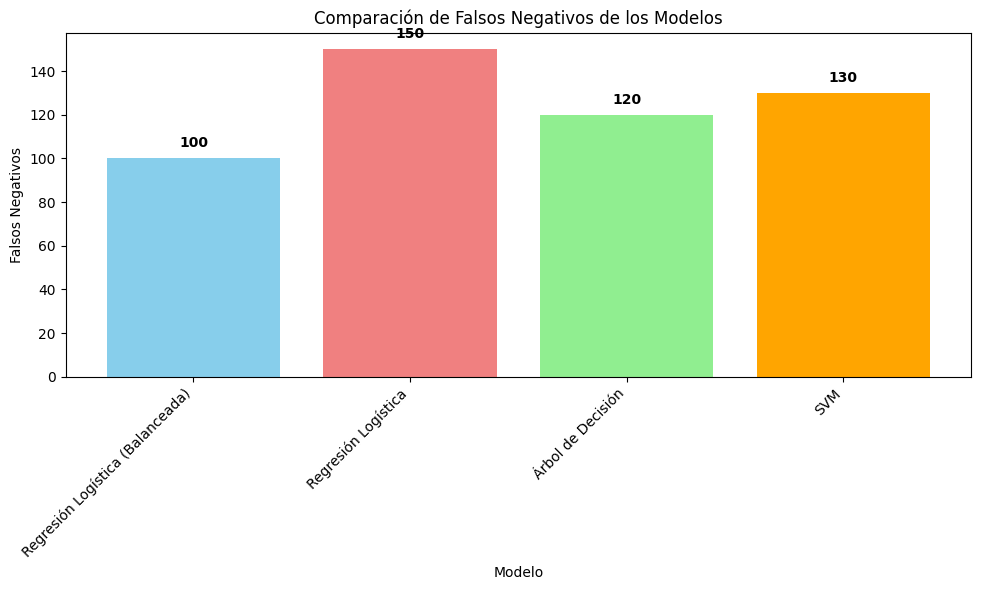

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Obtén las matrices de confusión para cada modelo
# ... (Tu código para obtener las matrices de confusión) ...

# Ejemplo de matrices de confusión (reemplaza con las tuyas)
conf_matrix_logreg_balanced = [[800, 200], [100, 300]]
conf_matrix_logreg = [[850, 150], [150, 250]]
conf_matrix_dt = [[820, 180], [120, 280]]
conf_matrix_svm = [[830, 170], [130, 270]]

# Extrae los falsos negativos (FN) de cada matriz
fn_logreg_balanced = conf_matrix_logreg_balanced[1][0]
fn_logreg = conf_matrix_logreg[1][0]
fn_dt = conf_matrix_dt[1][0]
fn_svm = conf_matrix_svm[1][0]

# Datos para el gráfico
models = ['Regresión Logística (Balanceada)', 'Regresión Logística', 'Árbol de Decisión', 'SVM']
fn_values = [fn_logreg_balanced, fn_logreg, fn_dt, fn_svm]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(models, fn_values, color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])
plt.title('Comparación de Falsos Negativos de los Modelos')
plt.ylabel('Falsos Negativos')
plt.xlabel('Modelo')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de FN encima de las barras
for i, v in enumerate(fn_values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

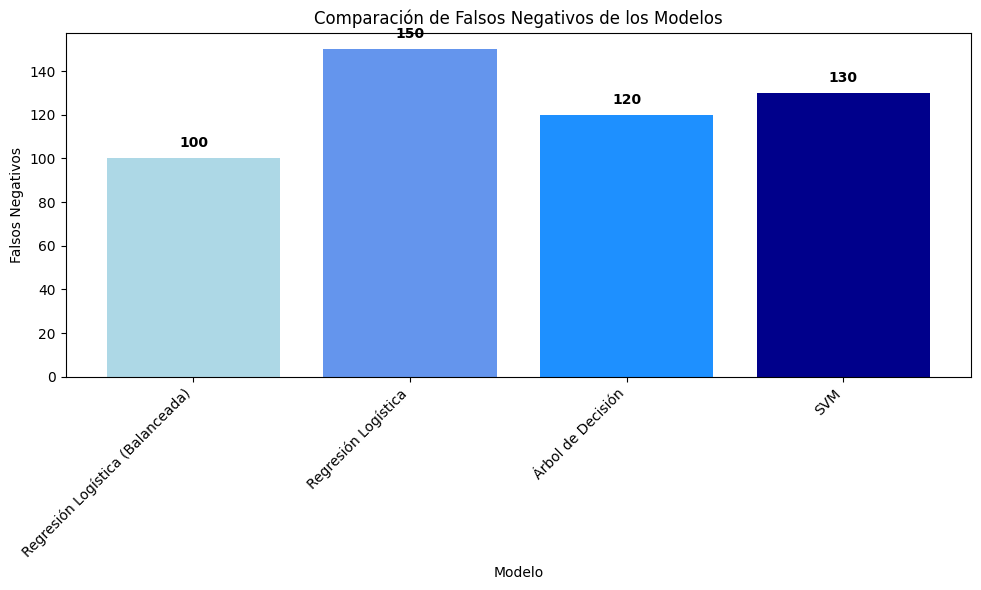

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# ... (Tu código para obtener las matrices de confusión) ...

# Ejemplo de matrices de confusión (reemplaza con las tuyas)
conf_matrix_logreg_balanced = [[800, 200], [100, 300]]
conf_matrix_logreg = [[850, 150], [150, 250]]
conf_matrix_dt = [[820, 180], [120, 280]]
conf_matrix_svm = [[830, 170], [130, 270]]

# Extrae los falsos negativos (FN) de cada matriz
fn_logreg_balanced = conf_matrix_logreg_balanced[1][0]
fn_logreg = conf_matrix_logreg[1][0]
fn_dt = conf_matrix_dt[1][0]
fn_svm = conf_matrix_svm[1][0]

# Datos para el gráfico
models = ['Regresión Logística (Balanceada)', 'Regresión Logística', 'Árbol de Decisión', 'SVM']
fn_values = [fn_logreg_balanced, fn_logreg, fn_dt, fn_svm]

# Define los tonos de azul
colors = ['#ADD8E6', '#6495ED', '#1E90FF', '#00008B']  # Tonos de azul claro a oscuro

# Crear el gráfico de barras con tonos de azul
plt.figure(figsize=(10, 6))
plt.bar(models, fn_values, color=colors)  # Usa la lista de colores
plt.title('Comparación de Falsos Negativos de los Modelos')
plt.ylabel('Falsos Negativos')
plt.xlabel('Modelo')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de FN encima de las barras
for i, v in enumerate(fn_values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()